## Credit Card Consumption Prediction 信用卡消費預測
- 以此三個月的資料預測未來三個月的信用卡消費。

### 預測
- 信用卡在未來三個月內的平均花費 (cc_cons)

### 特徵定義
- id &rArr; 每個客戶的唯一ID
- account_type &rArr; 帳戶類型 - [活期帳戶&rArr;Current accounts] 或 [儲蓄帳戶：Saving accounts]
- gender &rArr; 客戶的性別
- age &rArr; 客戶的年齡
- region_code &rArr; 要求居住地區（有訂單）
- cc_cons_apr &rArr; 信用卡credit card 在 4月份花費
- dc_cons_apr &rArr; 扣賬卡Debit Card 在 4月份花費
- cc_cons_may &rArr; 信用卡credit card 在 5月份花費
- dc_cons_may &rArr; 扣賬卡Debit Card 在 5月份花費
- cc_cons_jun &rArr; 信用卡credit card 在 6月份花費
- dc_cons_jun &rArr; 扣賬卡Debit Card 在 6月份花費
- cc_count_apr &rArr; 信用卡credit card 在 4月份交易數量
- cc_count_may &rArr; 信用卡credit card 在 5月份交易數量
- cc_count_jun &rArr; 信用卡credit card 在 6月份交易數量
- dc_count_apr &rArr; 扣賬卡Debit Card 在 4月份交易數量
- dc_count_may &rArr; 扣賬卡Debit Card 在 5月份交易數量
- dc_count_jun &rArr; 扣賬卡Debit Card 在 6月份交易數量
- card_lim &rArr; 信用卡最大限制金額
- personal_loan_active &rArr; 與其他銀行有效的個人貸款
- vehicle_loan_active &rArr; 與其他銀行有效的車輛貸款
- personal_loan_closed &rArr; 在過去12個月內關閉個人貸款
- vehicle_loan_closed &rArr; 過去12個月的關閉車輛貸款
- investment_1 &rArr; 6月的DEMAT投資
- investment_2 &rArr; 6月份固定存款投資
- investment_3 &rArr; 6月的人壽保險投資
- investment_4 &rArr; 6月一般保險投資
- debit_amount_apr &rArr; 4月份借記的總金額
- credit_amount_apr &rArr; 4月份貸記的總金額
- debit_count_apr &rArr; 4月借記的總次數
- credit_count_apr &rArr; 4月貸記的總次數
- max_credit_amount_apr &rArr; 4月份最高金額
- debit_amount_may &rArr; 5月份借記的總金額
- credit_amount_may &rArr; 5月份貸記的總金額
- credit_count_may &rArr; 5月份貸記的總次數
- debit_count_may &rArr; 5月份借記的總次數
- max_credit_amount_may &rArr; 5月份最高金額
- debit_amount_jun &rArr; 6月借記​​的總金額
- credit_amount_jun &rArr; 6月總金額
- credit_count_jun &rArr; 6月份貸記的總次數
- debit_count_jun &rArr; 6月份借記的總次數
- max_credit_amount_jun &rArr; 6月份的最高金額
- loan_enq &rArr; 過去3個月的貸款詢問
- emi_active &rArr; 每月EMI支付給其他銀行有效貸款
- cc_cons &rArr; （目標）接下來三個月的平均信用卡花費


In [30]:
# 事前準備
import os
import numpy as np          # 資料處理分析工具
import pandas as pd         # 資料處理分析工具
from scipy import stats     # 統計函式庫
from scipy.stats import norm, skew
from collections import Counter # counter是字典，用來計數，key是要計數的item，value儲存的是個數
from sklearn.preprocessing import LabelEncoder # 用於特徵提取, 將數值資料轉為離散
from sklearn.preprocessing import MinMaxScaler

# 匯入必要的函式庫
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

# 資料視覺化
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette() # 生成各種顏色
sns.set_style('darkgrid') # 設置主題：darkgrid、whitegrid、dark、white、ticks
# 設定展示欄位最大值
pd.set_option('display.max_row', 200) 
pd.set_option('display.max_columns', 100) 
# plt 顯示中文
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
# 忽略警告
import warnings
warnings.filterwarnings("ignore")
# 避開科學記號顯示數值
pd.set_option('display.float_format',lambda x:'%f' % x)

In [31]:
# 載入資料集
dataset = pd.read_csv('./data/Credit Card Consumption Prediction/Credit_Card_Consumption_Prediction.csv')
dataset.head(5)

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,23334,saving,M,63,305,7695.000000,NaN,479.000000,NaN,622.000000,NaN,2.000000,1.000000,3.000000,NaN,NaN,NaN,150000.000000,NaN,NaN,NaN,NaN,NaN,118845.200000,50000.000000,NaN,51205.470000,50259.000000,3.000000,1.000000,50000.000000,24740.220000,114252.000000,3.000000,2.000000,45000.000000,20215.850000,1279.370000,7.000000,3.000000,470.000000,NaN,0.000000,435
1,20329,current,M,33,326,52702.000000,988.720000,29873.000000,NaN,1087.000000,2806.240000,11.000000,14.000000,11.000000,1.000000,NaN,6.000000,176000.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,159050.760000,169812.000000,20.000000,9.000000,70000.000000,103102.850000,174606.000000,6.000000,10.000000,150000.000000,122037.660000,55390.000000,8.000000,19.000000,27000.000000,NaN,4963.330000,1921
2,17679,current,M,44,264,10800.490000,3215.520000,21660.000000,1607.000000,1168.000000,355.000000,6.000000,9.000000,6.000000,3.000000,2.000000,14.000000,65000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51484.550000,38942.000000,16.000000,4.000000,11700.000000,15283.000000,23051.000000,2.000000,7.000000,13800.000000,46827.000000,29297.910000,6.000000,19.000000,20800.000000,NaN,0.000000,1970
3,16428,saving,M,44,233,20936.000000,NaN,2094.000000,NaN,11778.500000,NaN,9.000000,6.000000,6.000000,NaN,NaN,NaN,600000.000000,NaN,NaN,NaN,NaN,NaN,132442.000000,NaN,NaN,1981.070000,2294.000000,2.000000,1.000000,2000.000000,19361.240000,19529.000000,1.000000,1.000000,19300.000000,5426.550000,7544.000000,3.000000,1.000000,5300.000000,NaN,1238.180000,21579
4,18721,saving,F,35,324,1183.830000,NaN,3656.290000,NaN,945.000000,NaN,2.000000,7.000000,9.000000,NaN,NaN,NaN,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6462.000000,10271.000000,6.000000,1.000000,10000.000000,7461.000000,3194.000000,2.000000,3.000000,3000.000000,26178.050000,53483.000000,4.000000,4.000000,45000.000000,NaN,0.000000,1814


#### 觀察資料

In [32]:
# 確認資料特徵類型
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32820 entries, 0 to 32819
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32820 non-null  int64  
 1   account_type           32820 non-null  object 
 2   gender                 32820 non-null  object 
 3   age                    32820 non-null  int64  
 4   region_code            32820 non-null  int64  
 5   cc_cons_apr            32820 non-null  float64
 6   dc_cons_apr            13768 non-null  float64
 7   cc_cons_may            32820 non-null  float64
 8   dc_cons_may            15481 non-null  float64
 9   cc_cons_jun            32820 non-null  float64
 10  dc_cons_jun            11523 non-null  float64
 11  cc_count_apr           30421 non-null  float64
 12  cc_count_may           31667 non-null  float64
 13  cc_count_jun           31230 non-null  float64
 14  dc_count_apr           13768 non-null  float64
 15  dc

#### 檢查缺失值 Missing Value

Text(0.5, 1.0, '資料集中的缺失值數量')

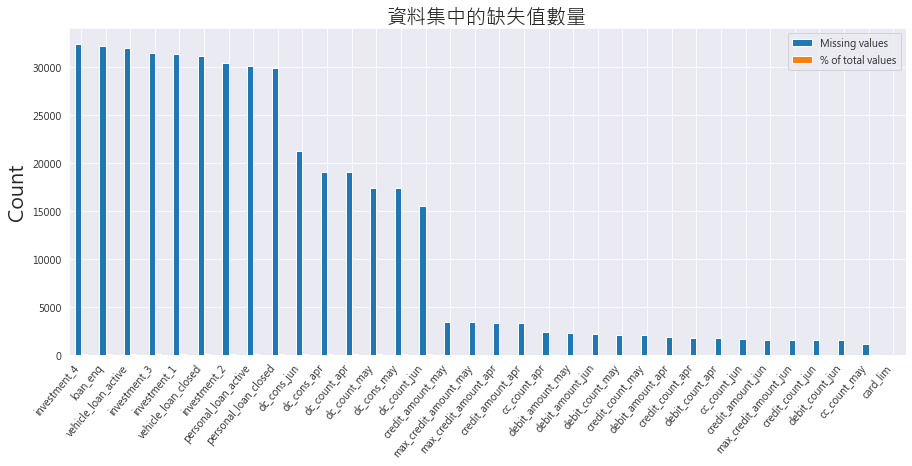

In [53]:
# 定義缺失值檢測函數
def missing_value_table(df):
    
    # 計算所有的缺失值
    mis_val = df.isnull().sum()
    
    # 佔 % 比
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # 合併
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # 給予合併的表格 每個column各一個新名字
    mis_val_rename = mis_val_table.rename(columns = {0:'Missing values', 1:'% of total values'})
    
    # 剔除沒有缺失值的 並 排序
    # 判斷所有數據中的第一 row .iloc[:,1]!=0] 不等於 0的 
    # .iloc[:,1] 代表Missing value 那個 column
    mis_val_rename = mis_val_rename[mis_val_rename.iloc[:,1]!=0].sort_values('Missing values',ascending=False)
    
    return mis_val_rename

missing_value_table(dataset).plot(kind="bar", figsize = (15,6), fontsize = 10)
plt.xticks(rotation=50, ha='right')
plt.ylabel("Count", fontsize = 20)
plt.title("資料集中的缺失值數量", fontsize = 20)

#### 填補缺失值  
> investment_4 ~ investment_1 (一般保險投資) : 判斷空值即為沒有投資，補 0  
> loan_enq (過去3個月的貸款詢問) : 沒有問貸款 就是 N (此特徵為object，Y 或 N)  
> vehicle_loan_active、vehicle_loan_closed (車貸) : 沒有就補 0，非1即0 
> personal_loan_active、personal_loan_closed (貸款) : 沒有就補 0，非1即0


Text(0.5, 1.0, '資料集中的缺失值數量')

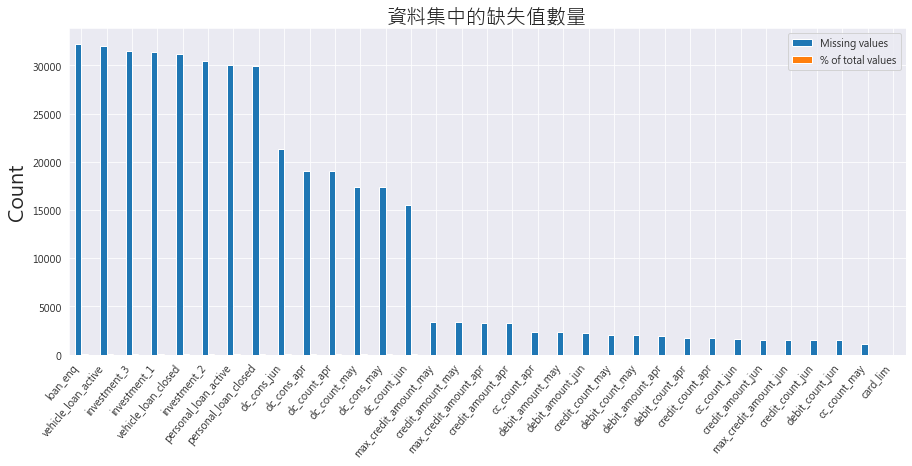

In [54]:
# 投資補 0
dataset['investment_4'] = dataset['investment_4'].fillna('0')
dataset['investment_3'] = dataset['investment_3'].fillna('0')
dataset['investment_2'] = dataset['investment_2'].fillna('0')
dataset['investment_1'] = dataset['investment_1'].fillna('0')
# 是否有問貸款 缺值補 N 
dataset['loan_enq'] = dataset['loan_enq'].fillna('N')
# 車貸 沒有就補 0
dataset['vehicle_loan_active'] = dataset['vehicle_loan_active'].fillna('0')
dataset['vehicle_loan_closed'] = dataset['vehicle_loan_closed'].fillna('0')
# 個人貸款貸 沒有就補 0
dataset['personal_loan_active'] = dataset['personal_loan_active'].fillna('0')
dataset['personal_loan_closed'] = dataset['personal_loan_closed'].fillna('0')
# 信用卡與扣帳卡的花費與交易數量 沒有就補 0
dataset['dc_cons_jun'] = dataset['dc_cons_jun'].fillna('0')
dataset['dc_cons_apr'] = dataset['dc_cons_apr'].fillna('0')
dataset['dc_count_apr'] = dataset['dc_count_apr'].fillna('0')
dataset['dc_count_may'] = dataset['dc_count_may'].fillna('0')
dataset['dc_cons_may'] = dataset['dc_cons_may'].fillna('0')
dataset['dc_count_jun'] = dataset['dc_count_jun'].fillna('0')
dataset['cc_count_apr'] = dataset['cc_count_apr'].fillna('0')
dataset['cc_count_jun'] = dataset['cc_count_jun'].fillna('0')
dataset['cc_count_may'] = dataset['cc_count_may'].fillna('0')
# 借貸的金額
dataset['credit_amount_may'] = dataset['credit_amount_may'].fillna('0')
dataset['max_credit_amount_may'] = dataset['max_credit_amount_may'].fillna('0')
dataset['max_credit_amount_apr'] = dataset['max_credit_amount_apr'].fillna('0')
dataset['credit_amount_apr'] = dataset['credit_amount_apr'].fillna('0')
dataset['debit_amount_may'] = dataset['debit_amount_may'].fillna('0')
dataset['debit_amount_jun'] = dataset['debit_amount_jun'].fillna('0')
dataset['debit_count_may'] = dataset['debit_count_may'].fillna('0')
dataset['credit_count_may'] = dataset['credit_count_may'].fillna('0')
dataset['debit_amount_apr'] = dataset['debit_amount_apr'].fillna('0')
dataset['credit_count_apr'] = dataset['credit_count_apr'].fillna('0')
dataset['debit_count_apr'] = dataset['debit_count_apr'].fillna('0')
dataset['credit_amount_jun'] = dataset['credit_amount_jun'].fillna('0')
dataset['max_credit_amount_jun'] = dataset['max_credit_amount_jun'].fillna('0')
dataset['credit_count_jun'] = dataset['credit_count_jun'].fillna('0')
dataset['debit_count_jun'] = dataset['debit_count_jun'].fillna('0')
# 信用卡最大限制金額
dataset['card_lim'] = dataset['card_lim'].fillna('0')

missing_value_table(dataset).plot(kind="bar", figsize = (15,6), fontsize = 10)
plt.xticks(rotation=50, ha='right')
plt.ylabel("Count", fontsize = 20)
plt.title("資料集中的缺失值數量", fontsize = 20)